# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [ ]:
import pandas as pd

df = pd.read_csv(PATH+'/train.csv')
df.describe()

b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [ ]:
def num_nans(df):
    return len(df[(df == 0).any(axis=1)])

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [ ]:
def drop_na(df):
    return df.dropna(axis=1,thresh=200)

df = drop_na(df)
df.columns

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [ ]:
def to_numerical(df):
    df2=df['Sex']
    df2.replace("male",0,inplace=True)
    df2.replace("female",1,inplace=True)
    return df2

df['Sex'] = to_numerical(df)
df.head()
df.columns

e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [ ]:
def extract_names(df):
    names = df['Name'].str.extract(r'(\w+),\s(\w+)\.\s(\w+)\s(\w+)',expand=True)
    # names = names.apply(lambda s:[i for i in s if i!=''])
    # print(names)
    names.columns = ['Last Name', 'Title', 'First Name', 'Middle Name']
    # return pd.concat([df, names], axis=1)
    return names
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [ ]:
def replace_with_mean(df):
    mean_age=df['Age'].mean()
    df['Age'].fillna(mean_age, inplace=True)
    return df['Age']

df['Age'] = replace_with_mean(df)
df.head()

The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

In [ ]:
def plot_age(df):
    df2=df.groupby('Survived')['Age'].mean()
    plt.bar(df2.index,df2.values)
    plt.show()
plot_age(df)

-> your answer here

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

In [ ]:
def plot_survived(df):
    df2=df.groupby('Survived')['Sex'].agg(lambda x: (x == 1).mean())
    plt.bar(df2.index,df2.values)
    plt.show()
    return df2
plot_survived(df)

-> your answer here

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

In [ ]:
def plot_title(df):
    df2=df.groupby('Title')['Survived'].mean()
    plt.bar(df2.index,df2.values)
    plt.show()
    return df2

plot_title(df)

-> your answer here

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

In [ ]:
def plot_fare(df):
  df2=df.groupby("Survived")["Fare"].mean()
  print(df2)
  plt.bar(["died", "survived"],df2.values)
  return
plot_fare(df)

-> your answer here

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

In [ ]:
df.boxplot(by='Survived', column=['Fare'], grid=True)

plt.show()

Those who were survived, male or female, all had higher-than-normal fares. This shows that rich people have a greater chance of being survived. In addition, the outlier value of fares for female passengers is higher, which shows that women need to be more dignified and rich to be rescued。

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [ ]:
def centralize(df,s):
  mean=df[s].mean()
  std=df[s].std()
  df2=df
  df2[s]=df2[s].apply(lambda x: (x-mean)/std)
  return df2
df=centralize(df,"Fare")
df.head()

l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [ ]:
import numpy as np
df2 = df.select_dtypes(include=[np.number])
print(df2.head())

m) Ignoring passenger ID, write a function that returns the names of the N most similar **pairs** of passengers using the euclidean distance and ignoring pairs that have distance zero - (15 points)

In [ ]:
from scipy.spatial.distance import pdist, squareform
def N_most_similar_pairs(df, N):
    df.index=df['Name']
    df = df.select_dtypes(include=[np.number])
    df = df.drop("PassengerId", axis=1)
    distances = pdist(df, metric='euclidean')
    distances = squareform(distances)
    indices = np.argsort(distances, axis=None)
    pairs = []
    width = distances.shape[1]
    for i in indices:
        row=i//width
        col=i%width
        if distances[row,col] == 0:
            continue
        pairs.append((df.index[row], df.index[col], distances[row,col]))
        if len(pairs) == N:
            break
    return pairs[:N]
df= pd.read_csv(PATH+'/train.csv')
print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

## Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/) and challenge your understanding of clustering and kmeans.

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. Hint: the centroid of the cluster has the same dimensions as the images in the dataset. - (10 points)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()
# print(mnist.data.shape)
# plt.gray()
# plt.matshow(mnist.images[1])
# plt.show()
data = mnist.data
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
for i in range(10):
    plt.imshow(centroids[i].reshape(8, 8), cmap="gray")
    plt.show()

# your code here

b) Each of the images has a label corresponding to the digit that the image represents. These labels generate a clustering of the images where all images of digit 1 for example are in cluster labeled `1`. Compare the [silhouette scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the clustering you created above to those of the clustering generated from the labels attached to each image. Explain - (10 points)

In [ ]:
from sklearn.metrics import silhouette_score


kmeans_silhouette_score = silhouette_score(data, kmeans.labels_)
print(kmeans_silhouette_score)


labels_silhouette_score = silhouette_score(data, mnist.target)
print(labels_silhouette_score)


The result shows that the KMeans clustering has a higher silhouette score than the clustering generated from the labels. It means that the objects in the KMeans clustering are more similar to each other within their own clusters and less similar to objects in other clusters, compared to the clustering generated from the labels. 
So KMeans clustering is better in this case.

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (5 points)

In [ ]:
import numpy as np
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data=unpickle("./data_batch_1")
print(data.keys())
X=data[b'data']
y=np.array(data[b'labels']).reshape(-1,1)
print(X.shape)
print(y.shape)

# randomly pick a row
rand_row=np.random.randint(0,X.shape[0])
print(rand_row)

import matplotlib.pyplot as plt
rand_image=X[rand_row].reshape(32,32,3)
plt.imshow(rand_image)
plt.show()

d) This image is 32 x 32 = 1024 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. So, in a way, we have a dataset of 1024 3-dimensional data points. By applying Kmeans to this dataset, we are clustering for similar colors (so all the blues might be in the same cluster etc.). The centroid of each cluster will also be an RGB color. We can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K colors to recreate the image.

Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

For example, if the original image is the following:

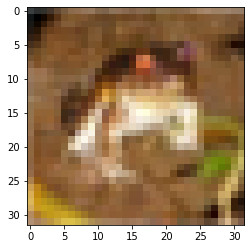

In [2]:
from IPython.display import Image
Image(filename="frog.png", width=300, height=300)

The transformation, using only 4 colors / centroids would look like:

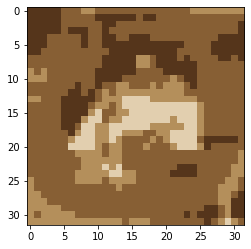

In [3]:
Image(filename="frog_4.png", width=300, height=300)

In [ ]:
# from IPython.display import Image
# image_f=Image(filename="frog.png", width=300, height=300)
# from PIL import Image
# image = Image.open(image_f.filename)
image = rand_image
image = np.array(image)
print(image.shape)
# Flatten the image into a 83332x3 array
flattened_image = image.reshape(-1, 3)
print(flattened_image.shape)

# Apply KMeans clustering to the flattened image
kmeans = KMeans(n_clusters=4)
kmeans.fit(flattened_image)

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_
print(centroids)
print("*"*50)
# Assign each pixel to its nearest centroid
labels = kmeans.predict(flattened_image)
print(len(labels))
new_image = centroids[labels].reshape(32, 32, 3)
print(new_image)
plt.imshow(new_image)
plt.show()

e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

In [ ]:
# from IPython.display import Image
# image_f=Image(filename="frog.png", width=300, height=300)
# from PIL import Image
# image = Image.open(image_f.filename)
image = rand_image
image = np.array(image)
print(image.shape)
# Flatten the image into a 83332x3 array
flattened_image = image.reshape(-1, 3)
print(flattened_image.shape)

# Apply KMeans clustering to the flattened image
num=input("please enter the number of color:")
kmeans = KMeans(n_clusters=num)
kmeans.fit(flattened_image)

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_
print(centroids)
print("*"*50)
# Assign each pixel to its nearest centroid
labels = kmeans.predict(flattened_image)
print(len(labels))
new_image = centroids[labels].reshape(32, 32, 3)
print(new_image)
plt.imshow(new_image)
plt.show()